# COWEB

Informacion extraida de la libreria https://github.com/cmaclell/concept_formation

Ejemplo: http://concept-formation.readthedocs.io/en/latest/examples/cobweb3_cluster_iris.html

Instalacion:
pip install -U concept_formation

## Importar librerias

In [5]:
from random import shuffle
from random import seed

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import adjusted_rand_score

from concept_formation.cobweb3 import Cobweb3Tree
from concept_formation.cluster import cluster
from concept_formation.datasets import load_iris

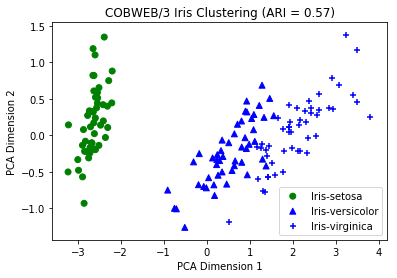

In [7]:
seed(0)
irises = load_iris()
shuffle(irises)

tree = Cobweb3Tree()
irises_no_class = [{a: iris[a] for a in iris if a != 'class'} for iris in irises]
clusters = cluster(tree, irises_no_class)[0]
iris_class = [iris[a] for iris in irises for a in iris if a == 'class']
ari = adjusted_rand_score(clusters, iris_class)

dv = DictVectorizer(sparse=False)
iris_X = dv.fit_transform([{a:iris[a] for a in iris if a != 'class'} for iris in irises])
pca = PCA(n_components=2)
iris_2d_x = pca.fit_transform(iris_X)

colors = ['b', 'g', 'r', 'y', 'k', 'c', 'm']
shapes = ['o', '^', '+']
clust_set = {v:i for i,v in enumerate(list(set(clusters)))}
class_set = {v:i for i,v in enumerate(list(set(iris_class)))}

for class_idx, class_label in enumerate(class_set):
    x = [v[0] for i,v in enumerate(iris_2d_x) if iris_class[i] == class_label]
    y = [v[1] for i,v in enumerate(iris_2d_x) if iris_class[i] == class_label]
    c = [colors[clust_set[clusters[i]]] for i,v in enumerate(iris_2d_x) if
         iris_class[i] == class_label]
    plt.scatter(x, y, color=c, marker=shapes[class_idx], label=class_label)

plt.title("COBWEB/3 Iris Clustering (ARI = %0.2f)" % (ari))
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(loc=4)
plt.show()